<a href="https://colab.research.google.com/github/hassanabsi/Diabetes-predicting/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv("Diabetes_prediction.csv")



In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


## Missing values Checking


In [47]:
print("Missing values summary:")
print(df.isnull().sum())

Missing values summary:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64


In [48]:
print("Data types:")
print(df.dtypes)

Data types:
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Diagnosis                     int64
dtype: object


In [49]:
print("Number of rows and columns:")
print(df.shape)



Number of rows and columns:
(1000, 9)


##Descriptive statistics

In [50]:
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1000.000000  1000.000000    1000.000000    1000.000000  1000.000000   
mean      1.771000    99.440607      72.179837      23.278316    84.582679   
std       1.354398    19.470730      13.882017       1.173807    74.872733   
min       0.000000    30.571402      31.401487      19.369987  -165.310033   
25%       1.000000    86.145927      62.795447      22.501591    35.076535   
50%       2.000000    99.458362      71.909588      23.275225    84.442232   
75%       3.000000   113.264556      82.082660      24.052022   134.267842   
max       8.000000   161.238939     110.723715      26.917654   317.701852   

               BMI  DiabetesPedigreeFunction          Age   Diagnosis  
count  1000.000000               1000.000000  1000.000000  1000.00000  
mean     25.433600                  0.449383    43.281798     0.30600  
std       3.690223                  0.199334    14.465398

## Class imbalance check

In [51]:

class_counts = df["Diagnosis"].value_counts()
print("Class counts:\n", class_counts)

if class_counts.shape[0] == 2:  # Check for binary classification only
    imbalance_ratio = class_counts.max() / class_counts.min()
    print(f"Class imbalance ratio: {imbalance_ratio:.2f}")

#The imbalance ratio of 2.27 indicates a moderate level of class imbalance.

Class counts:
 0    694
1    306
Name: Diagnosis, dtype: int64
Class imbalance ratio: 2.27


##Data visualizing

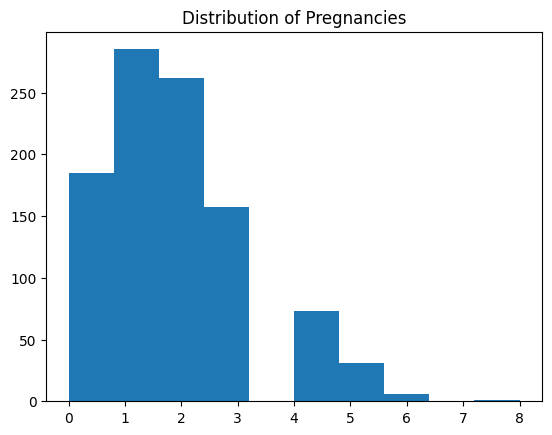

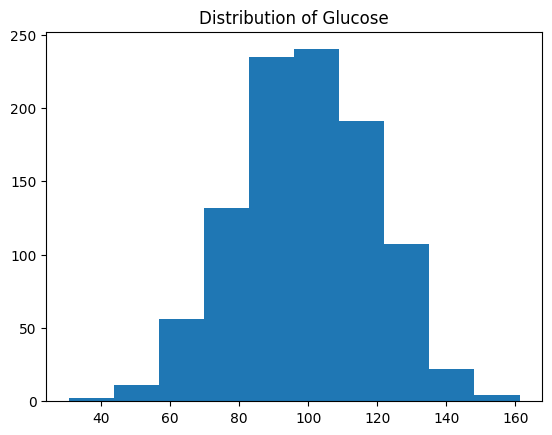

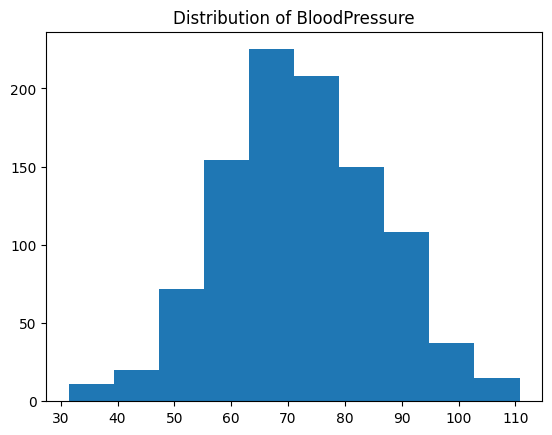

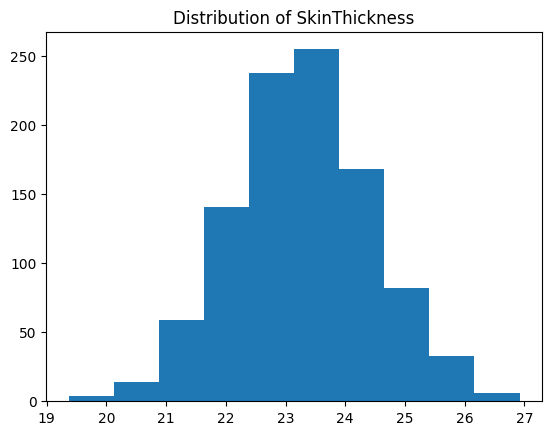

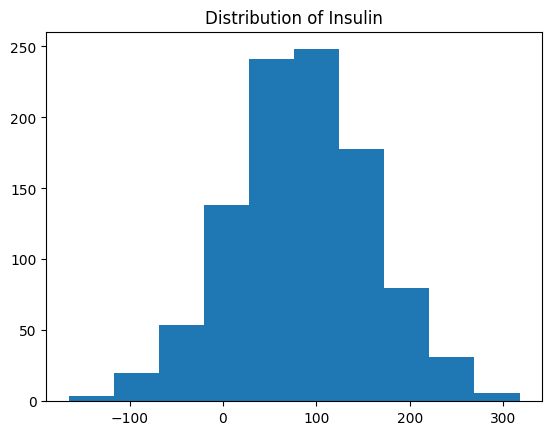

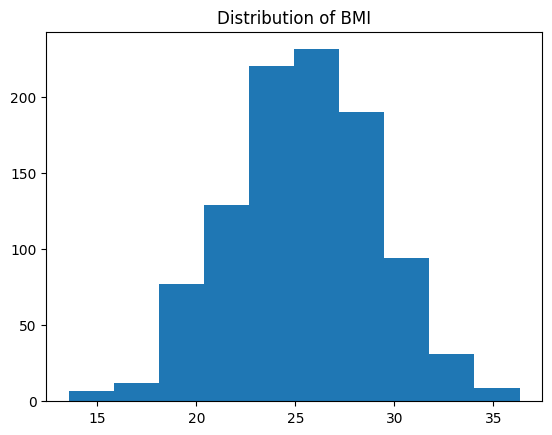

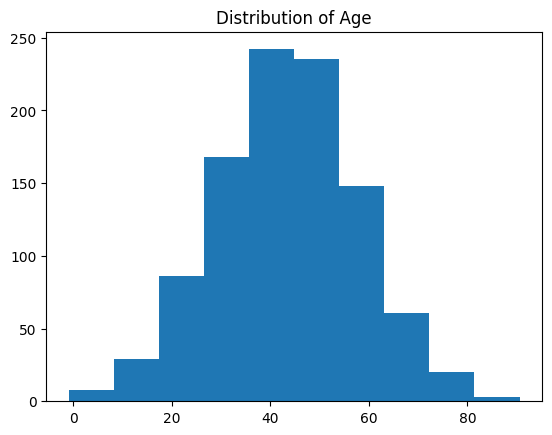

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
for feature in numerical_features:
    plt.hist(df[feature])
    plt.title(f"Distribution of {feature}")
    plt.show()

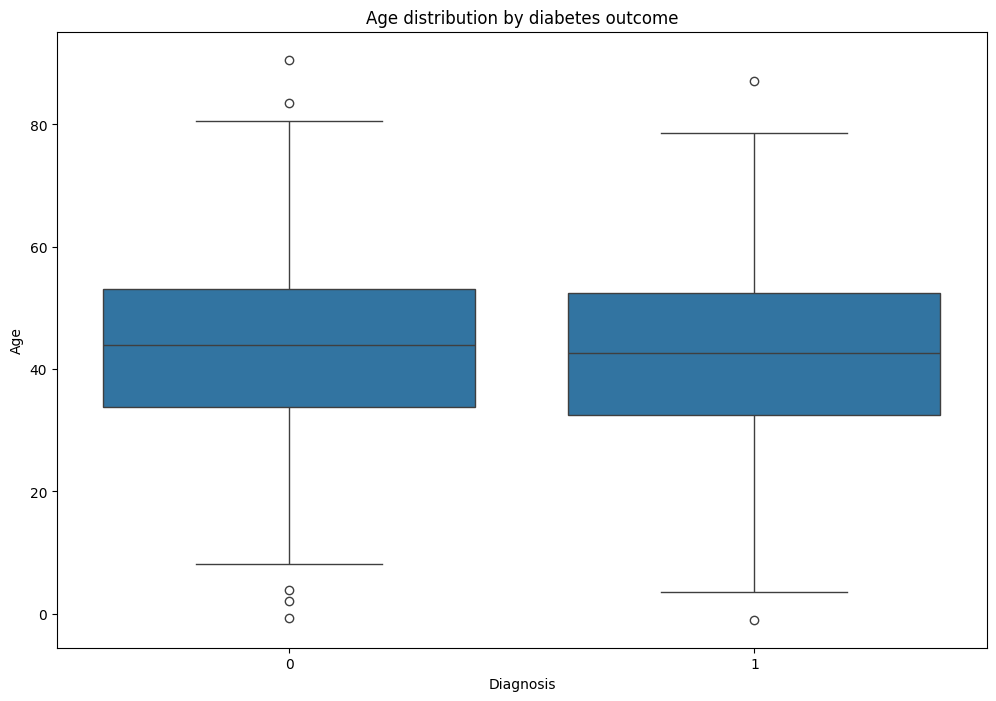

In [53]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Diagnosis", y="Age")
plt.title("Age distribution by diabetes outcome")
plt.show()


### Scatter plots for feature relationships


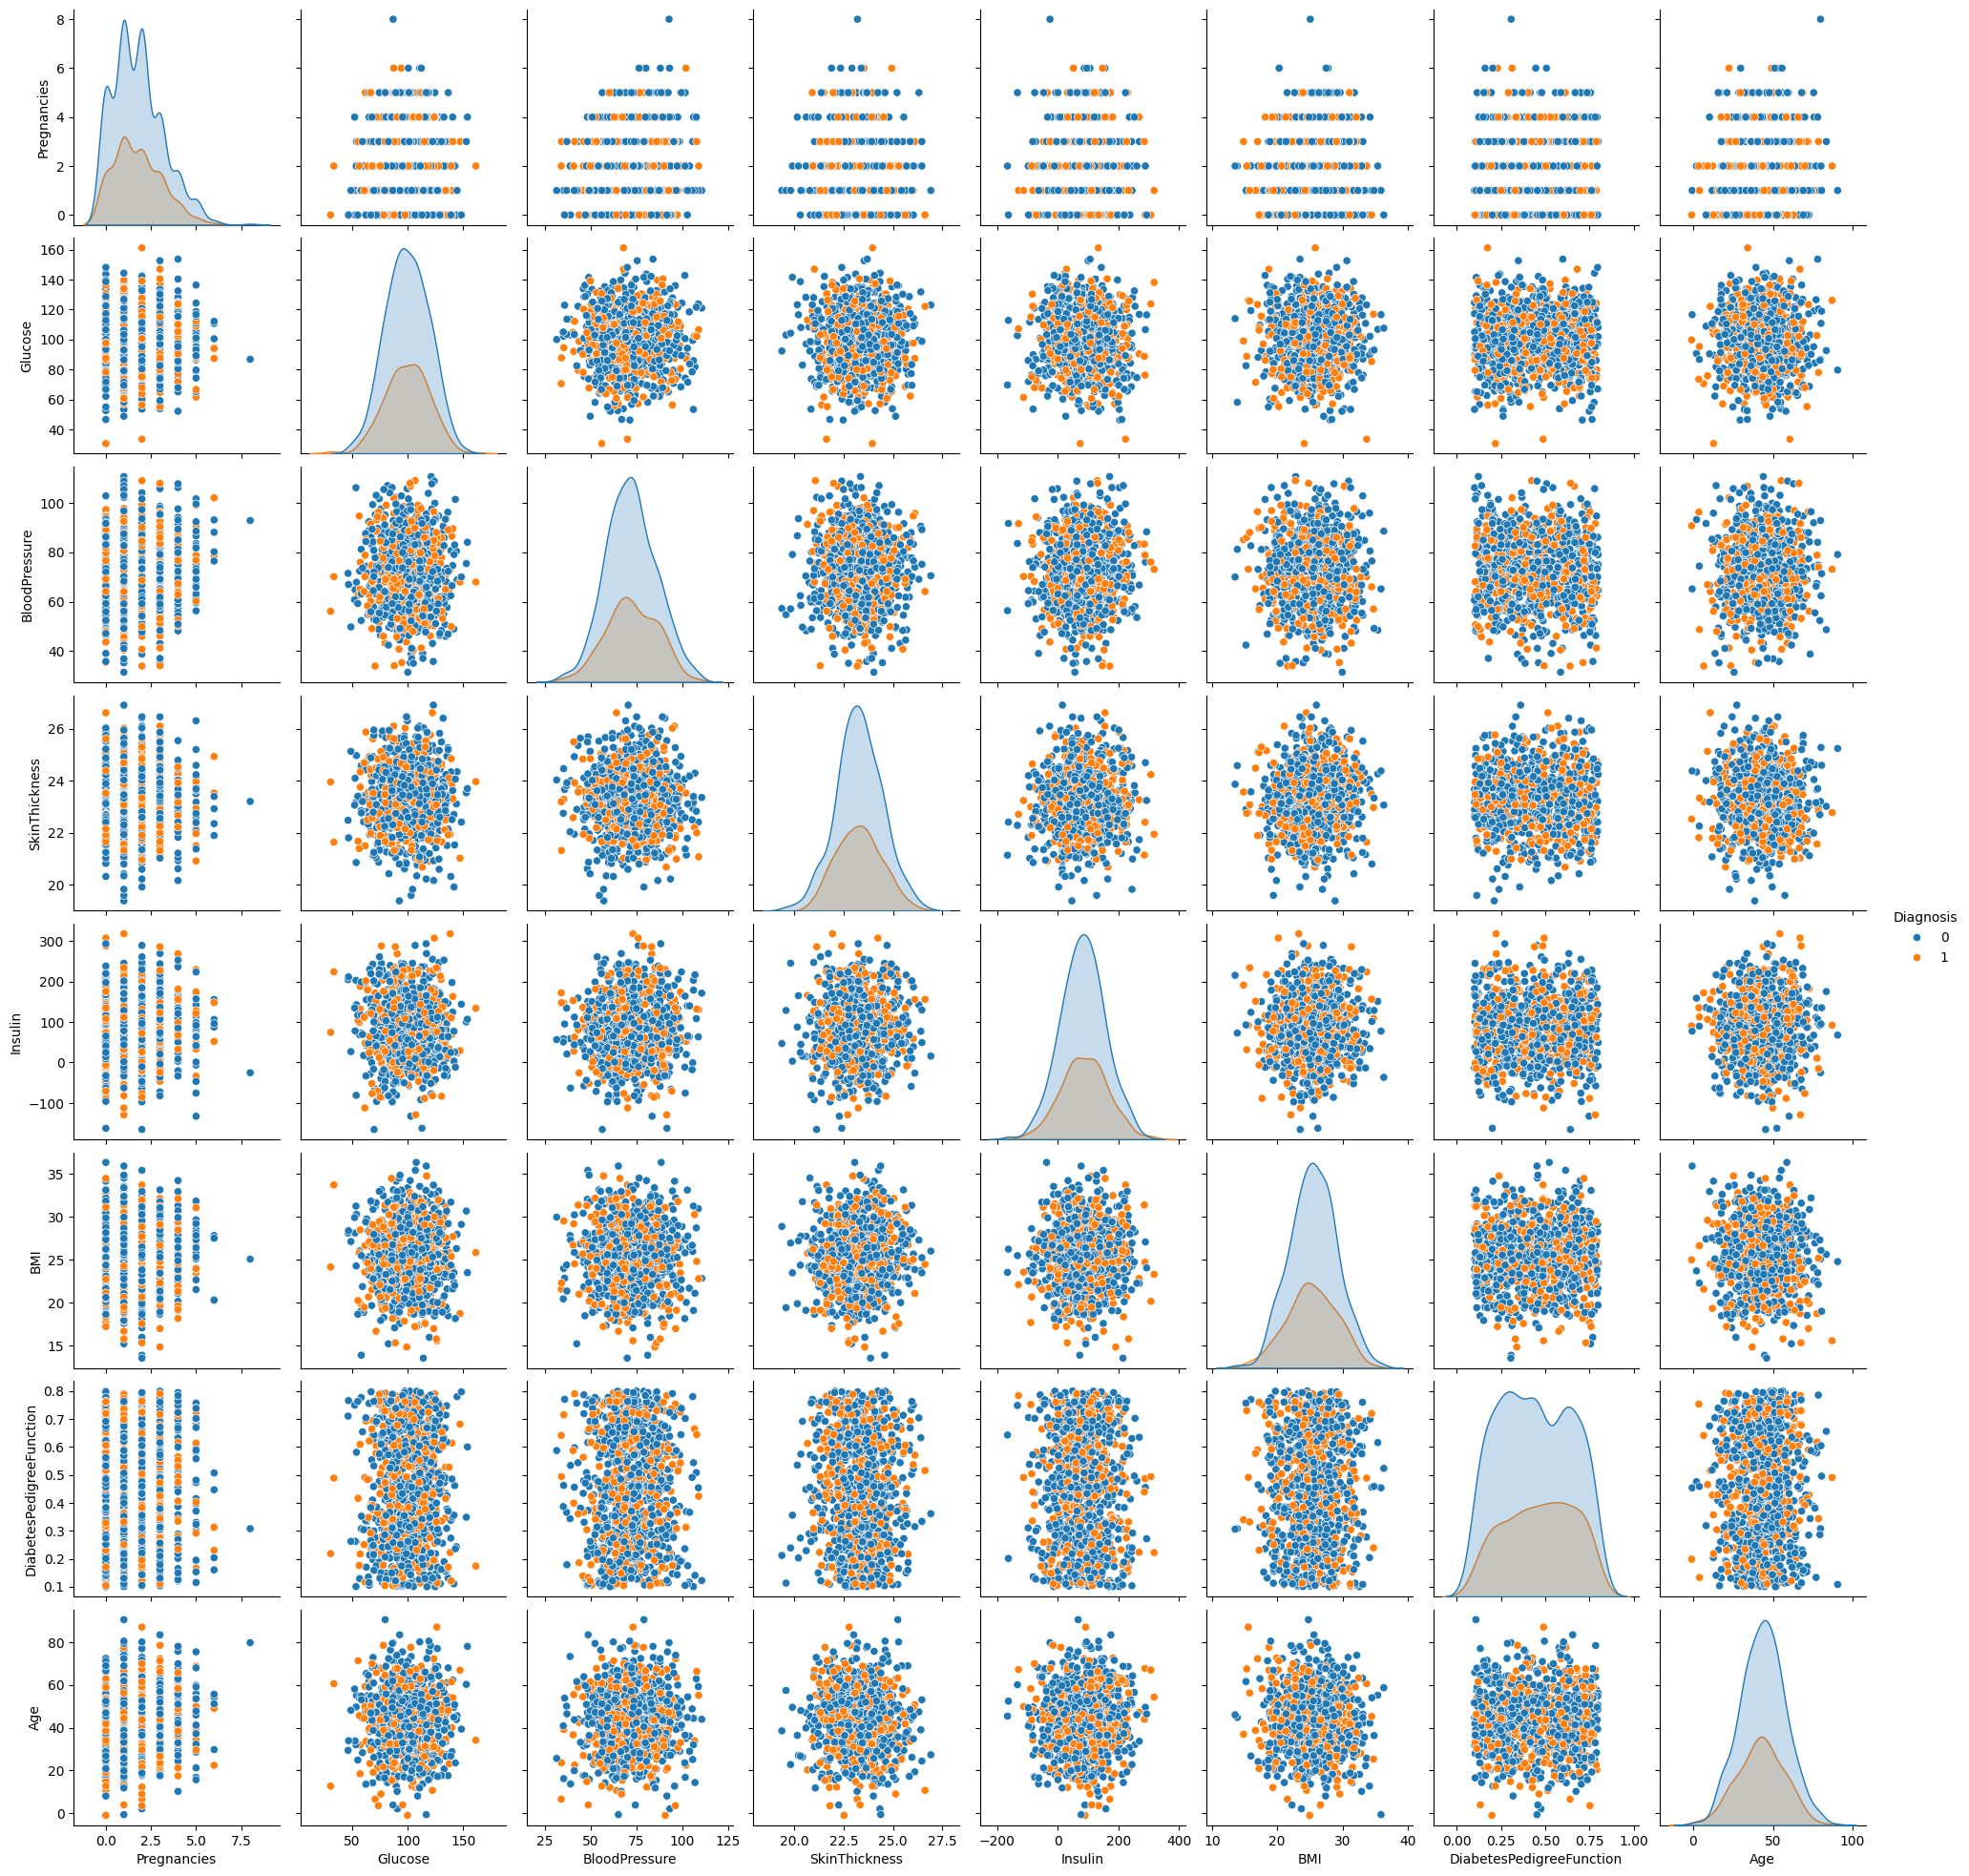

In [54]:
sns.pairplot(df, hue="Diagnosis")
plt.show()



## Heatmap for correlations


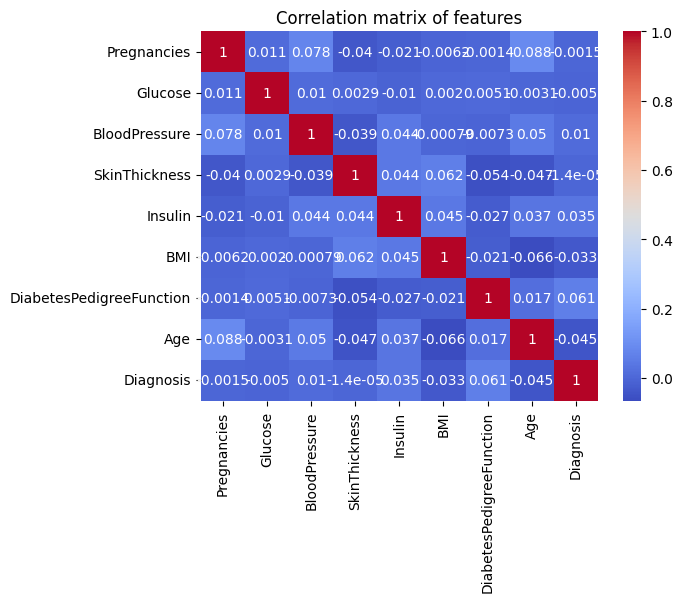

In [55]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of features")
plt.show()

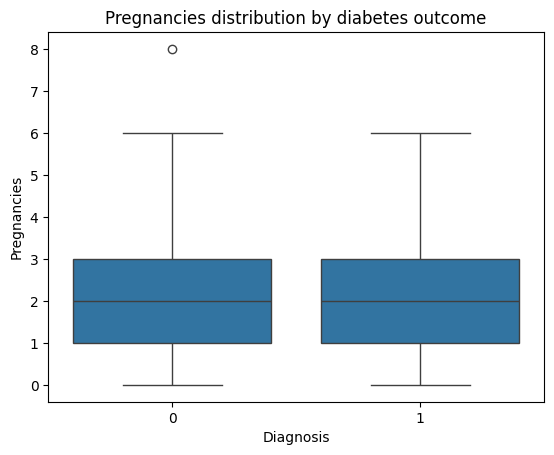

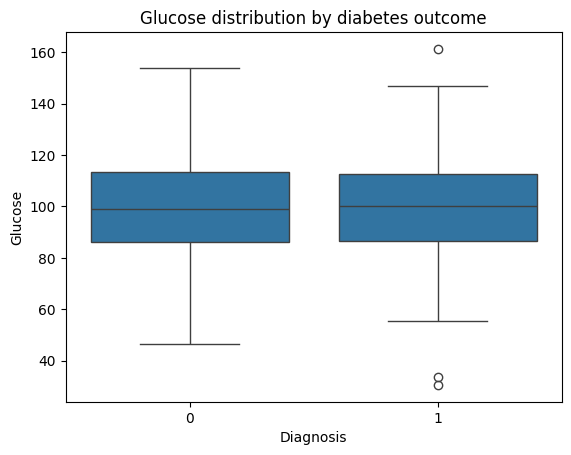

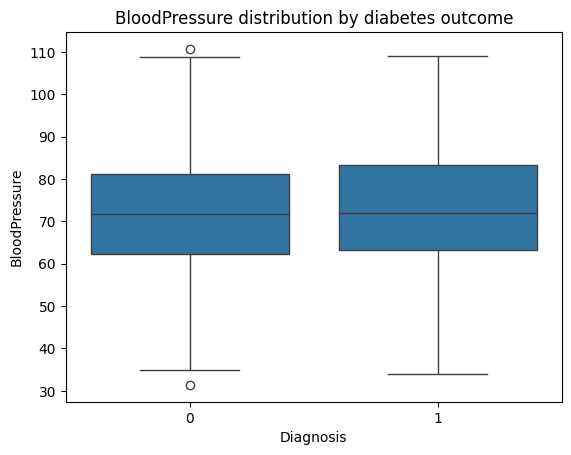

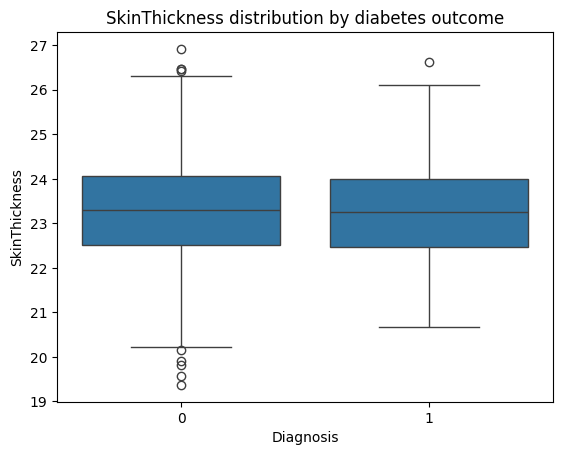

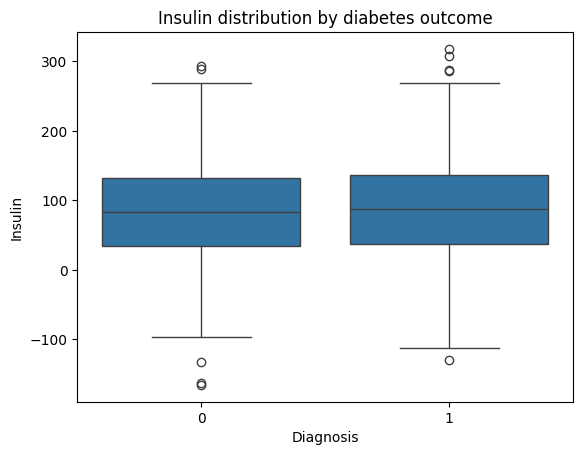

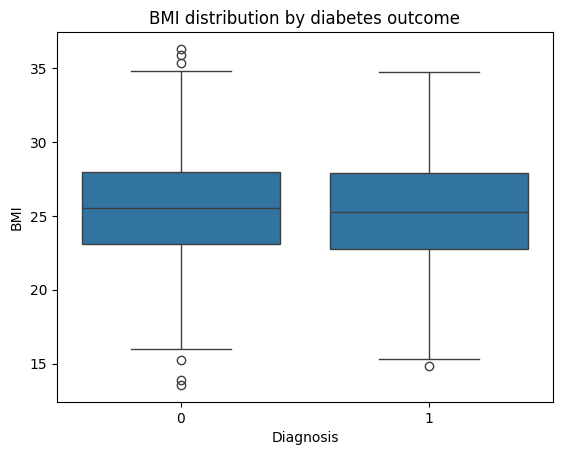

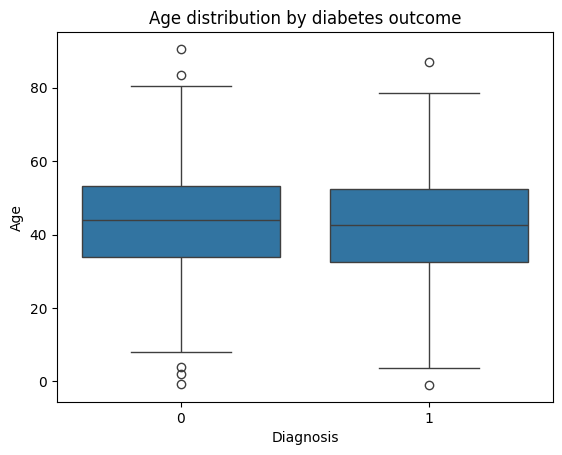

In [56]:
for feature in numerical_features:
    plt.figure()
    sns.boxplot(x="Diagnosis", y=feature, data=df)
    plt.title(f"{feature} distribution by diabetes outcome")
    plt.show()

##Cost-Sensitive Learning
###Handling Class Imbalance

In [57]:
cost_matrix = [[0, 3],  # Cost of predicting non-diabetic when they are diabetic
               [1, 0]]   # Cost of predicting diabetic when they are non-diabetic


In [58]:
from sklearn.utils import class_weight


In [59]:
class_weights = class_weight.compute_class_weight(
    'balanced',  # Method for calculating weights
    classes=df['Diagnosis'].unique(),  # Unique class labels
    y=df['Diagnosis']  # True labels for the data
)


##Feature Scaling:



In [60]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [61]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

scaler = StandardScaler()

# Fit the scaler on the features
scaler.fit(X)

X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Reuse original column names

# Combine the scaled features and target variable into a new DataFrame
df_scaled = pd.concat([X_scaled, y], axis=1)

In [62]:
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,0.169163,0.843882,-1.136506,0.902150,0.130996,0.277179,-0.886898,-1.603337,0
1,0.169163,-0.357150,-0.112743,0.140873,0.722517,-0.413036,1.083028,0.112773,0
2,-0.569542,-0.580604,-0.642679,0.107438,0.865573,-0.944955,1.137547,0.343479,1
3,0.169163,0.463106,-0.316121,-2.153677,0.322962,-0.331933,-0.801800,-0.036791,0
4,-0.569542,1.459784,1.624917,-0.575543,-0.792577,2.050733,0.762580,-0.725127,0


###visiualise the data after scaling

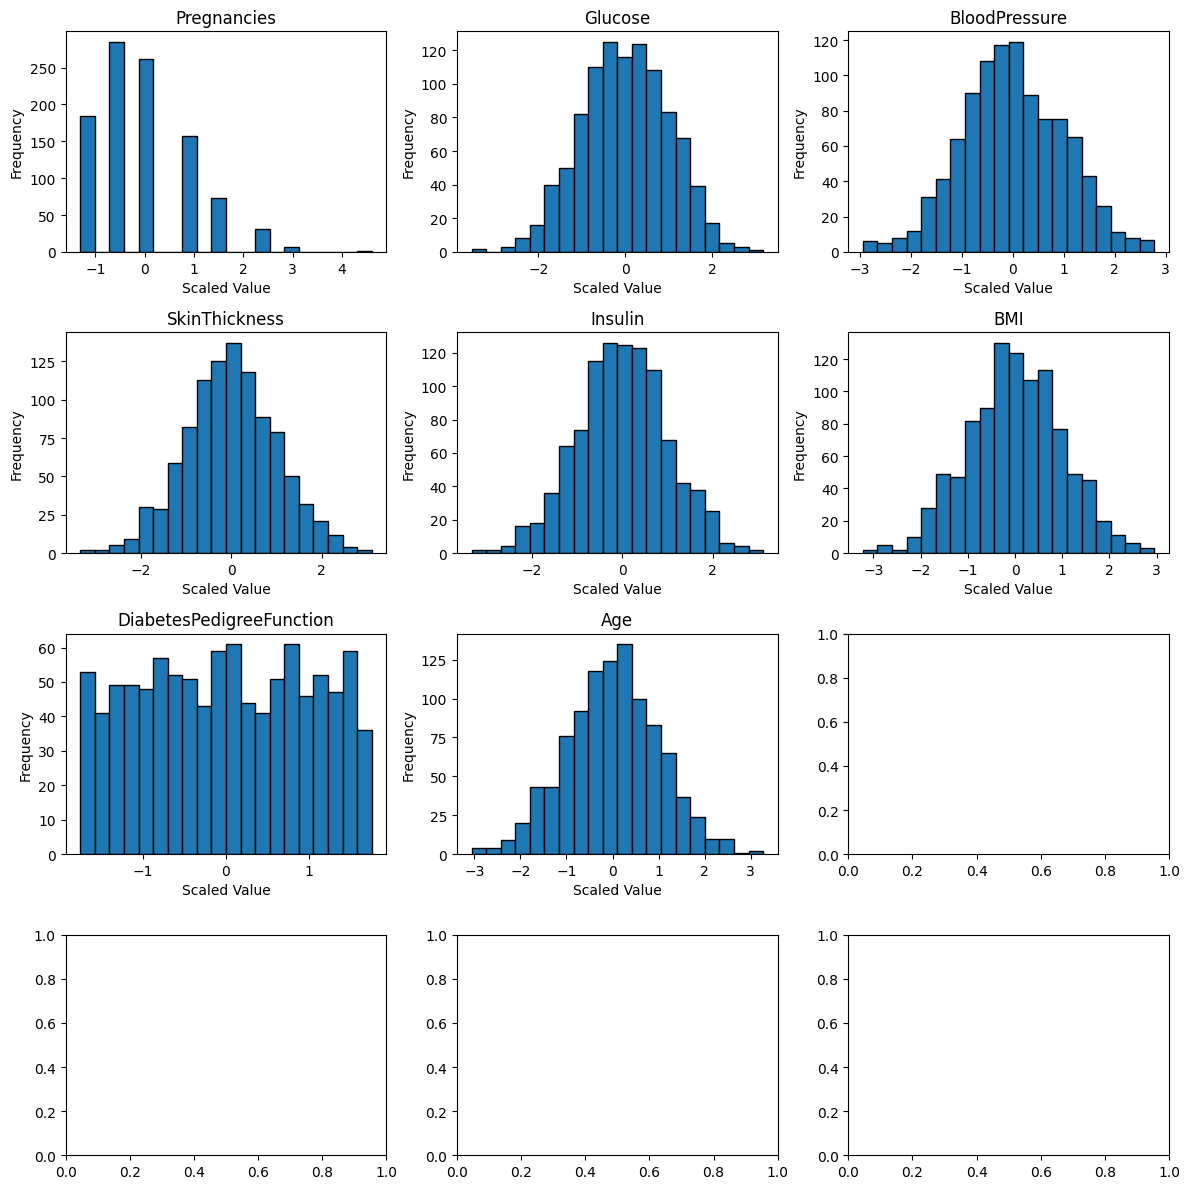

In [63]:
import matplotlib.pyplot as plt
import pandas as pd


features = df_scaled.drop('Diagnosis', axis=1)

fig, axes = plt.subplots(4, 3, figsize=(12, 12))  # Adjust layout as needed

# Iterate through features and plot their distributions
for i, (col, ax) in enumerate(zip(features.columns, axes.flat)):
    ax.hist(features[col], bins=20, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Scaled Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


##Feature Selection:



In [64]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif


X = df_scaled.drop('Diagnosis', axis=1)
y = df_scaled['Diagnosis']

# Select top 5 features according to F-test score
selector_f = SelectKBest(f_classif, k=5)
X_f = selector_f.fit_transform(X, y)  # Transform features using selected features

selected_feature_indices = selector_f.get_support(indices=True)

X_selected = df_scaled.iloc[:, selected_feature_indices]

print("New DataFrame with selected features:")
print(X_selected)


New DataFrame with selected features:
     BloodPressure   Insulin       BMI  DiabetesPedigreeFunction       Age
0        -1.136506  0.130996  0.277179                 -0.886898 -1.603337
1        -0.112743  0.722517 -0.413036                  1.083028  0.112773
2        -0.642679  0.865573 -0.944955                  1.137547  0.343479
3        -0.316121  0.322962 -0.331933                 -0.801800 -0.036791
4         1.624917 -0.792577  2.050733                  0.762580 -0.725127
..             ...       ...       ...                       ...       ...
995      -2.242902 -0.546623  0.111827                  0.032632 -1.616829
996      -0.583564  0.360526 -1.618413                 -0.997934  0.078853
997      -0.580719  0.314770 -0.732178                  1.566395  1.083679
998      -1.172681  1.803144  1.731273                 -0.333807  0.252254
999      -0.221134  0.664834  1.535945                  0.785231 -0.103465

[1000 rows x 5 columns]


In [65]:
import pandas as pd


combined_df = pd.concat([X_selected, df_scaled['Diagnosis']], axis=1)

print("Combined DataFrame:")
print(combined_df)


Combined DataFrame:
     BloodPressure   Insulin       BMI  DiabetesPedigreeFunction       Age  \
0        -1.136506  0.130996  0.277179                 -0.886898 -1.603337   
1        -0.112743  0.722517 -0.413036                  1.083028  0.112773   
2        -0.642679  0.865573 -0.944955                  1.137547  0.343479   
3        -0.316121  0.322962 -0.331933                 -0.801800 -0.036791   
4         1.624917 -0.792577  2.050733                  0.762580 -0.725127   
..             ...       ...       ...                       ...       ...   
995      -2.242902 -0.546623  0.111827                  0.032632 -1.616829   
996      -0.583564  0.360526 -1.618413                 -0.997934  0.078853   
997      -0.580719  0.314770 -0.732178                  1.566395  1.083679   
998      -1.172681  1.803144  1.731273                 -0.333807  0.252254   
999      -0.221134  0.664834  1.535945                  0.785231 -0.103465   

     Diagnosis  
0            0  
1        

#models application

In [66]:
from sklearn.model_selection import train_test_split

# Set the test size (e.g., 20% for testing)
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(combined_df.drop('Diagnosis', axis=1),  # All columns except 'Diagnosis'
                                                    combined_df['Diagnosis'],
                                                    test_size=test_size,
                                                    random_state=42)  # Set random state for reproducibility



In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [68]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "f1": f1_score
}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Define model-specific parameter grid
    param_grid = {}
    if model_name == "Logistic Regression":
        param_grid = {"C": [0.01, 0.1, 1, 10, 100]}
    elif model_name == "Decision Tree":
        param_grid = {"max_depth": [3, 5, 7, 10]}
    elif model_name == "Random Forest":
        param_grid = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7, 10]}

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="f1")
    grid_search.fit(X_train, y_train)

    # Print best parameters and scores
    print(f"Best parameters: {grid_search.best_params_}")
    for metric_name, metric_func in metrics.items():
        score = metric_func(y_test, grid_search.best_estimator_.predict(X_test))
        print(f"{metric_name}: {score:.4f}")



Evaluating Logistic Regression...
Best parameters: {'C': 1}
accuracy: 0.6850
precision: 0.0000
recall: 0.0000
f1: 0.0000

Evaluating Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'max_depth': 10}
accuracy: 0.5850
precision: 0.3077
recall: 0.2540
f1: 0.2783

Evaluating Random Forest...
Best parameters: {'max_depth': 10, 'n_estimators': 50}
accuracy: 0.6700
precision: 0.4000
recall: 0.0952
f1: 0.1538
